In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as st

### Read In CSVs

In [3]:
raw_combine_data=pd.read_csv('Resources/raw_combine_data.csv')
raw_nba_data=pd.read_csv('Resources/raw_nba_data.csv')
season_data_df=pd.read_csv('Resources/season_data_height.csv')

### Finding Duplicates

In [4]:
nba_duplicates=raw_nba_data[raw_nba_data.duplicated(['PLAYER'])]
combine_duplicates=raw_combine_data[raw_combine_data.duplicated(['PLAYER'])]

### Drop Duplicates from Dataframes

In [5]:
dropped_combine_data=raw_combine_data.drop_duplicates(subset='PLAYER',keep='first')
dropped_nba_data=raw_nba_data.drop_duplicates(subset='PLAYER',keep='first')

### Merge DataFrames

In [6]:
merged_data_df=dropped_combine_data.merge(dropped_nba_data, on='PLAYER')

### Remove Players Who Didn't Take Enough Shots to Include in Analysis

In [7]:
merged_data_df=merged_data_df[merged_data_df['3PA']>10]
merged_data_df=merged_data_df[merged_data_df['2PA']>10]
merged_data_df=merged_data_df[merged_data_df['FTA']>10]

### Drop Rows w/ Missing Wingspan & Height Data

In [8]:
merged_data_df=merged_data_df.dropna(subset=['WINGSPAN'])
merged_data_df=merged_data_df.dropna(subset=['HEIGHT\xa0W/O\xa0SHOES'])

merged_data_df.reset_index(inplace=True)
merged_data_df.drop(axis=1, labels='index', inplace=True)

### Wingspan Conversion to Inches

In [9]:
wingspan = []
wingspan_convert=[]

wingspan = merged_data_df['WINGSPAN']
wingspan_list = wingspan.tolist()
for wingspan in wingspan_list:
    wingspan_cleaned = wingspan.strip("'").split("'")
    wingspan_convert.append((int(wingspan_cleaned[0])*12)+(float(wingspan_cleaned[1])))

merged_data_df['WINGSPAN']=wingspan_convert

### Height w/o Shoes Conversion to Inches

In [10]:
height_wo_shoes = []
height_wo_shoes_convert=[]

height_wo_shoes = merged_data_df['HEIGHT\xa0W/O\xa0SHOES']
height_wo_shoes_list = height_wo_shoes.tolist()
height_wo_shoes_list
for height in height_wo_shoes_list:
    height_cleaned = str(height).strip(" ' ").split("'")
    height_wo_shoes_convert.append((int(height_cleaned[0])*12)+(float(height_cleaned[1])))
    
merged_data_df['HEIGHT\xa0W/O\xa0SHOES']=height_wo_shoes_convert

## Establish RATIO = (Wingspan / Height)

In [11]:
ratio_wing_over_height = []

for i in range(len(wingspan_convert)):
    ratio_wing_over_height.append(wingspan_convert[i] / height_wo_shoes_convert[i])

### Export as CSV

In [12]:
merged_data_df.to_csv("Resources/merged_data.csv",index=False)

# 

# ANALYSIS

## Correlations List

In [38]:

# Height------------------------------------------------------------------------------------------------------
print("---------------Height Correlation-------------")
correlation = st.pearsonr(height_wo_shoes_convert,merged_data_df['2P%'])
print(f"The correlation between Height and 2P% is {round(correlation[0],2)}")

correlation = st.pearsonr(height_wo_shoes_convert,merged_data_df['3P%'])
print(f"The correlation between Height and 3P% is {round(correlation[0],2)}")

correlation = st.pearsonr(height_wo_shoes_convert,merged_data_df['FT%'])
print(f"The correlation between Height and FT% is {round(correlation[0],2)}")
print('\n')


# Wingspan------------------------------------------------------------------------------------------------------
print("---------------Wingspan Correlation-------------")
correlation = st.pearsonr(wingspan_convert,merged_data_df['2P%'])
print(f"The correlation between Wingspan and 2P% is {round(correlation[0],2)}")

correlation = st.pearsonr(wingspan_convert,merged_data_df['3P%'])
print(f"The correlation between Wingspan and 3P% is {round(correlation[0],2)}")

correlation = st.pearsonr(wingspan_convert,merged_data_df['FT%'])
print(f"The correlation between Wingspan and FT% is {round(correlation[0],2)}")
print('\n')


# Ratio------------------------------------------------------------------------------------------------------
print("---------------Ratio Correlation----------------")
correlation = st.pearsonr(ratio_wing_over_height,merged_data_df['2P%'])
print(f"The correlation between Ratio and 2P% is {round(correlation[0],2)}")

correlation = st.pearsonr(ratio_wing_over_height,merged_data_df['3P%'])
print(f"The correlation between Ratio and 3P% is {round(correlation[0],2)}")

correlation = st.pearsonr(ratio_wing_over_height,merged_data_df['FT%'])
print(f"The correlation between Ratio and FT% is {round(correlation[0],2)}")
print('\n')


# 2PA------------------------------------------------------------------------------------------------------
print("------------------2PA Correlation----------------")
correlation = st.pearsonr(merged_data_df['2PA'],merged_data_df['2P%'])
print(f"The correlation between 2PA and 2P% is {round(correlation[0],2)}")

correlation = st.pearsonr(merged_data_df['2PA'],merged_data_df['3P%'])
print(f"The correlation between 2PA and 3P% is {round(correlation[0],2)}")

correlation = st.pearsonr(merged_data_df['2PA'],merged_data_df['FT%'])
print(f"The correlation between 2PA and FT% is {round(correlation[0],2)}")
print('\n')


# 3PA------------------------------------------------------------------------------------------------------
print("------------------3PA Correlation----------------")
correlation = st.pearsonr(merged_data_df['3PA'],merged_data_df['2P%'])
print(f"The correlation between 3PA and 2P%  is {round(correlation[0],2)}")

correlation = st.pearsonr(merged_data_df['3PA'],merged_data_df['3P%'])
print(f"The correlation between 3PA and 3P%  is {round(correlation[0],2)}")

correlation = st.pearsonr(merged_data_df['3PA'],merged_data_df['FT%'])
print(f"The correlation between 3PA and FT%  is {round(correlation[0],2)}")
print('\n')


# FTA------------------------------------------------------------------------------------------------------
print("------------------FTA Correlation----------------")
correlation = st.pearsonr(merged_data_df['FTA'],merged_data_df['2P%'])
print(f"The correlation between FTA and 2P%  is {round(correlation[0],2)}")

correlation = st.pearsonr(merged_data_df['FTA'],merged_data_df['3P%'])
print(f"The correlation between FTA and 3P%  is {round(correlation[0],2)}")

correlation = st.pearsonr(merged_data_df['FTA'],merged_data_df['FT%'])
print(f"The correlation between FTA and FT%  is {round(correlation[0],2)}")
print('\n')

# 3P%------------------------------------------------------------------------------------------------------
print("------------------3P% Correlation----------------")
correlation = st.pearsonr(merged_data_df['3P%'],merged_data_df['FT%'])
print(f"The correlation between 3P% and FT%  is {round(correlation[0],2)}")

---------------Height Correlation-------------
The correlation between Height and 2P% is 0.32
The correlation between Height and 3P% is -0.12
The correlation between Height and FT% is -0.25


---------------Wingspan Correlation-------------
The correlation between Wingspan and 2P% is 0.27
The correlation between Wingspan and 3P% is -0.25
The correlation between Wingspan and FT% is -0.3


---------------Ratio Correlation----------------
The correlation between Ratio and 2P% is -0.02
The correlation between Ratio and 3P% is -0.22
The correlation between Ratio and FT% is -0.13


------------------2PA Correlation----------------
The correlation between 2PA and 2P% is 0.11
The correlation between 2PA and 3P% is 0.05
The correlation between 2PA and FT% is 0.2


------------------3PA Correlation----------------
The correlation between 3PA and 2P%  is -0.03
The correlation between 3PA and 3P%  is 0.42
The correlation between 3PA and FT%  is 0.37


------------------FTA Correlation-------------

# 

## Larger Correlations

### 3PA vs FT%

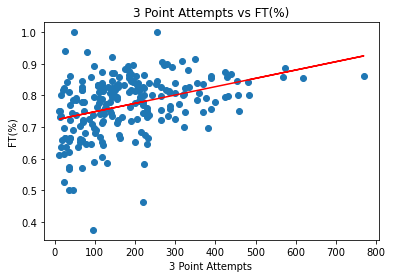

The line of best fit is : y = 0.0x + 0.72
The correlation between both factors is 0.37


In [14]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(merged_data_df['3PA'], merged_data_df['FT%'] )
regress_values = np.array(merged_data_df['3PA']) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(merged_data_df['3PA'],regress_values,color='red')
plt.scatter(x=merged_data_df['3PA'], y=merged_data_df['FT%'])
plt.ylabel('FT(%)')
plt.xlabel('3 Point Attempts ')
plt.title("3 Point Attempts vs FT(%)")
plt.show()
print(f"The line of best fit is : {line_eq}")
correlation = st.pearsonr(merged_data_df['3PA'],merged_data_df['FT%'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

### Height vs. 2P%

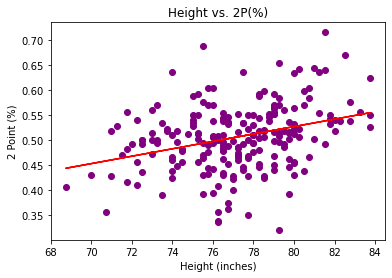

The correlation between both factors is 0.32


In [15]:
(correlation_coefficient) = st.pearsonr(height_wo_shoes_convert, merged_data_df['2P%'])[0]
(slope, intercept, r_value, p_value, standard_error) = st.linregress(height_wo_shoes_convert, merged_data_df['2P%'])

#Slope formula 'y=mx+b'
y = slope * np.array(height_wo_shoes_convert) + intercept

plt.scatter(x = height_wo_shoes_convert, y = merged_data_df['2P%'], color = "purple")
plt.xlabel('Height (inches)')
plt.ylabel('2 Point (%)')
plt.title('Height vs. 2P(%)')

plt.plot(height_wo_shoes_convert, y, color = 'red')
plt.show()
correlation = st.pearsonr(height_wo_shoes_convert,merged_data_df['2P%'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

### Wingspan vs. 3P%

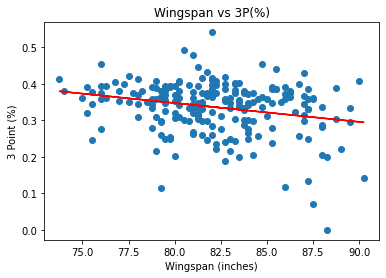

The correlation between both factors is -0.25


In [16]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(wingspan_convert, merged_data_df['3P%'] )
regress_values = np.array(wingspan_convert) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(wingspan_convert,regress_values,color='red')
plt.scatter(x=wingspan_convert, y=merged_data_df['3P%'])
plt.ylabel('3 Point (%)')
plt.xlabel('Wingspan (inches)')
plt.title("Wingspan vs 3P(%)")
plt.show()
correlation = st.pearsonr(wingspan_convert,merged_data_df['3P%'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

### Ratio vs. 3P%

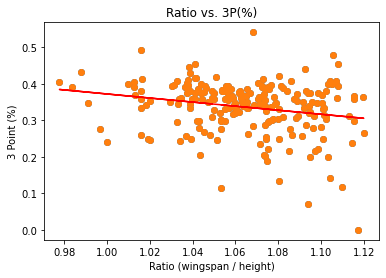

The correlation between both factors is -0.22


In [17]:
plt.scatter(ratio_wing_over_height,merged_data_df["3P%"])

(correlation_coefficient) = st.pearsonr(ratio_wing_over_height, merged_data_df['3P%'])[0]
(slope, intercept, r_value, p_value, standard_error) = st.linregress(ratio_wing_over_height, merged_data_df['3P%'])

y = slope * np.array(ratio_wing_over_height) + intercept

plt.scatter(x = ratio_wing_over_height, y = merged_data_df['3P%'])
plt.xlabel('Ratio (wingspan / height)')
plt.ylabel('3 Point (%)')
plt.title('Ratio vs. 3P(%)')

plt.plot(ratio_wing_over_height, y, color = 'red')
plt.show()
correlation = st.pearsonr(ratio_wing_over_height,merged_data_df['3P%'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

# 

## Lesser Correlations

### Wingspan vs. Free Throws

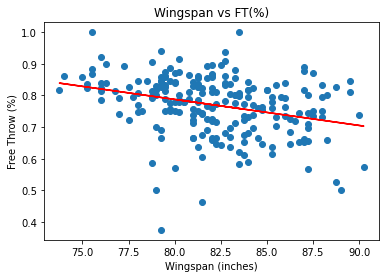

The correlation between both factors is -0.3


In [18]:

(slope, intercept, rvalue, pvalue, stderr) = linregress(wingspan_convert, merged_data_df['FT%'] )
regress_values = np.array(wingspan_convert) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(wingspan_convert,regress_values, color='red')
plt.scatter(x=wingspan_convert, y=merged_data_df['FT%'])
plt.ylabel('Free Throw (%)')
plt.xlabel('Wingspan (inches)')
plt.title("Wingspan vs FT(%)")
plt.show()
correlation = st.pearsonr(wingspan_convert,merged_data_df['FT%'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

### Wingspan vs. 2P%

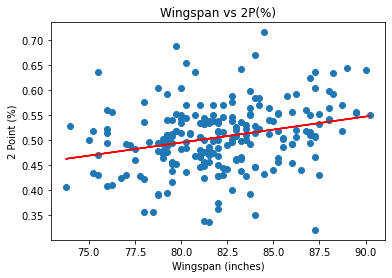

The correlation between both factors is 0.27


In [19]:

(slope, intercept, rvalue, pvalue, stderr) = linregress(wingspan_convert, merged_data_df['2P%'] )
regress_values = np.array(wingspan_convert) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(wingspan_convert,regress_values, color='red')
plt.scatter(x=wingspan_convert, y=merged_data_df['2P%'])
plt.ylabel('2 Point (%)')
plt.xlabel('Wingspan (inches)')
plt.title("Wingspan vs 2P(%)")
plt.show()
correlation = st.pearsonr(wingspan_convert,merged_data_df['2P%'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

### Height vs. FT%

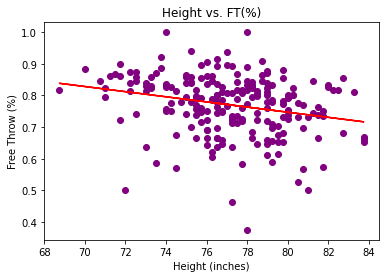

The correlation between both factors is -0.25


In [20]:
(correlation_coefficient) = st.pearsonr(height_wo_shoes_convert, merged_data_df['FT%'])[0]
(slope, intercept, r_value, p_value, standard_error) = st.linregress(height_wo_shoes_convert, merged_data_df['FT%'])

#Slope formula 'y=mx+b'
y = slope * np.array(height_wo_shoes_convert) + intercept

plt.scatter(x = height_wo_shoes_convert, y = merged_data_df['FT%'], color = "purple")
plt.xlabel('Height (inches)')
plt.ylabel('Free Throw (%)')
plt.title('Height vs. FT(%)')

plt.plot(height_wo_shoes_convert, y, color = 'red')
plt.show()
correlation = st.pearsonr(height_wo_shoes_convert,merged_data_df['FT%'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

### Height vs. 3P%

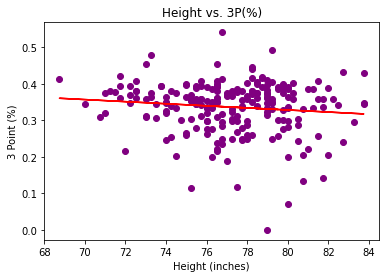

The correlation between both factors is -0.12


In [21]:
(correlation_coefficient) = st.pearsonr(height_wo_shoes_convert, merged_data_df['3P%'])[0]
(slope, intercept, r_value, p_value, standard_error) = st.linregress(height_wo_shoes_convert, merged_data_df['3P%'])

#Slope formula 'y=mx+b'
y = slope * np.array(height_wo_shoes_convert) + intercept

plt.scatter(x = height_wo_shoes_convert, y = merged_data_df['3P%'], color = "purple")
plt.xlabel('Height (inches)')
plt.ylabel('3 Point (%)')
plt.title('Height vs. 3P(%)')

plt.plot(height_wo_shoes_convert, y, color = 'red')
plt.show()
correlation = st.pearsonr(height_wo_shoes_convert,merged_data_df['3P%'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

### Ratio vs. FT%

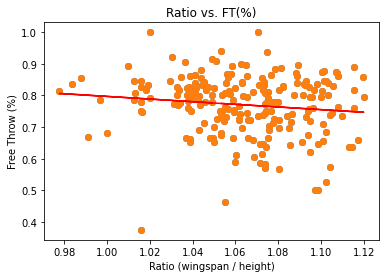

The correlation between both factors is -0.13


In [22]:
plt.scatter(ratio_wing_over_height,merged_data_df["FT%"])

correlation_coefficient = st.pearsonr(ratio_wing_over_height, merged_data_df['FT%'])[0]
(slope, intercept, r_value, p_value, standard_error) = st.linregress(ratio_wing_over_height, merged_data_df['FT%'])

y = slope * np.array(ratio_wing_over_height) + intercept

plt.scatter(x = ratio_wing_over_height, y = merged_data_df['FT%'])
plt.xlabel('Ratio (wingspan / height)')
plt.ylabel('Free Throw (%)')
plt.title('Ratio vs. FT(%)')

plt.plot(ratio_wing_over_height, y, color = 'red')
plt.show()
correlation = st.pearsonr(ratio_wing_over_height,merged_data_df['FT%'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

### Ratio vs. 2P%

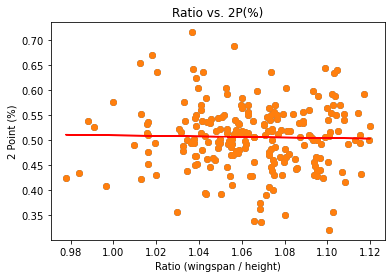

The correlation between both factors is -0.02


In [23]:
plt.scatter(ratio_wing_over_height,merged_data_df["2P%"])

correlation_coefficient = st.pearsonr(ratio_wing_over_height, merged_data_df['2P%'])[0]
(slope, intercept, r_value, p_value, standard_error) = st.linregress(ratio_wing_over_height, merged_data_df['2P%'])

y = slope * np.array(ratio_wing_over_height) + intercept

plt.scatter(x = ratio_wing_over_height, y = merged_data_df['2P%'])
plt.xlabel('Ratio (wingspan / height)')
plt.ylabel('2 Point (%)')
plt.title('Ratio vs. 2P(%)')

plt.plot(ratio_wing_over_height, y, color = 'red')
plt.show()
correlation = st.pearsonr(ratio_wing_over_height,merged_data_df['2P%'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

## 

# Comparing Scoring Ability Based on Height

## Seperate Players by Height

In [31]:
#Traditional Big men players are not as common and are mainly used to stretch the floor 
#rather than score points by posting up near the basket

tall_avg_ser=merged_data_df.loc[merged_data_df['HEIGHT\xa0W/O\xa0SHOES'] >= 76.50,:][['FTA','FT%','2PA','2P%','3PA', '3P%']].mean()
tall_med_ser=merged_data_df.loc[merged_data_df['HEIGHT\xa0W/O\xa0SHOES'] >= 76.50,:][['FTA','FT%','2PA','2P%','3PA', '3P%']].median()
tall_count=merged_data_df.loc[merged_data_df['HEIGHT\xa0W/O\xa0SHOES'] >= 76.50,:].count()['PLAYER']

short_avg_ser=merged_data_df.loc[merged_data_df['HEIGHT\xa0W/O\xa0SHOES'] < 76.50,:][['FTA','FT%','2PA','2P%','3PA', '3P%']].mean()
short_med_ser=merged_data_df.loc[merged_data_df['HEIGHT\xa0W/O\xa0SHOES'] < 76.50,:][['FTA','FT%','2PA','2P%','3PA', '3P%']].median()
short_count=merged_data_df.loc[merged_data_df['HEIGHT\xa0W/O\xa0SHOES'] < 76.50,:].count()['PLAYER']


central_tendency_df=pd.DataFrame({'Mean (Tall)':tall_avg_ser,
              'Median (Tall)':tall_med_ser,
              'Mean (Short)':short_avg_ser,
              'Median (Short)':short_med_ser   
})
central_tendency_df

,Mean (Tall),Median (Tall),Mean (Short),Median (Short)
FTA,113.304348,83.0000,115.827160,86.000
FT%,0.756667,0.7740,0.793333,0.816
2PA,271.644928,186.0000,278.098765,237.000
2P%,0.515014,0.5165,0.490654,0.497
3PA,167.210145,145.5000,205.098765,158.000
3P%,0.333000,0.3500,0.341988,0.352


### Tall vs Short Attempts Histogram

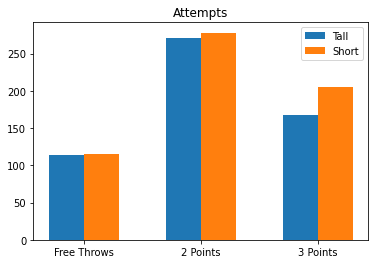

,Mean (Tall),Mean (Short)
FTA,113.304348,115.827160
2PA,271.644928,278.098765
3PA,167.210145,205.098765


In [33]:
N = 3
tall_players_stats = (113.304348, 271.644928, 167.210145)
short_players_stats = (115.827160, 278.098765, 205.098765)

ind = np.arange(N) 
width = 0.30

plt.bar(ind, tall_players_stats, width, label='Tall')
plt.bar(ind + width, short_players_stats, width, label='Short')

plt.title('Attempts')

plt.xticks(ind + width / 2, ('Free Throws', '2 Points', '3 Points'))
plt.legend(loc='best')
plt.show()
central_tendency_df[['Mean (Tall)','Mean (Short)']].loc[['FTA', '2PA', '3PA']]


### Tall vs Short Percentage Histogram

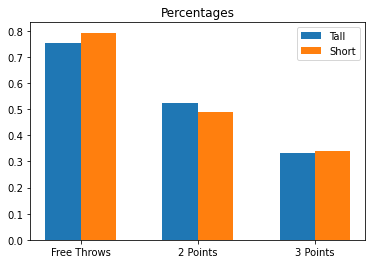

,Mean (Tall),Mean (Short)
FT%,0.756667,0.793333
2P%,0.515014,0.490654
3P%,0.333000,0.341988


In [34]:
N = 3
tall_players_stats = (0.752929, 0.525717, 0.334354)
short_players_stats = (0.793333, 0.490654, 0.341988)

ind = np.arange(N) 
width = 0.30

plt.bar(ind, tall_players_stats, width, label='Tall')
plt.bar(ind + width, short_players_stats, width, label='Short')

plt.title('Percentages')

plt.xticks(ind + width / 2, ('Free Throws', '2 Points', '3 Points'))
plt.legend(loc='best')
plt.show()
central_tendency_df[['Mean (Tall)','Mean (Short)']].loc[['FT%', '2P%', '3P%']]

# 

# Comparing Scoring Ability Based on Position

## Assign Positions

In [27]:
merged_data_df["POS"].replace({"PF-C":"PF","C-PF": "C", "PF-SF": "PF", "SF-PF":"SF","SG-PG":'SG',"PG-SG":"PG","SG-SF":"SG","SF-SG":"SF"}, inplace=True)
merged_data_df["POS"].unique() #Check that there are only 5 position

#Traditionally taller players are assigned the positions of CENTER, POWER FORWARD, & SMALL FORWARD
tall_short_list=[]
for index, row in merged_data_df.iterrows():
    if row['POS']=='PF':
        tall_short_list.append('Big Man')
    elif row['POS']=='SF':
        tall_short_list.append('Big Man')
    elif row['POS']=='C':
        tall_short_list.append('Big Man')
    else:
        tall_short_list.append('Average Man')
        
merged_data_df['Tall_Short']=tall_short_list

### Big Man Positions vs Average (Mean)

In [28]:
tall_short_gb=merged_data_df.groupby('Tall_Short')

In [29]:
tall_short_avg=tall_short_gb[['FTA','2PA','3PA','FT%','2P%','3P%']].mean()
tall_short_avg.rename_axis(None,inplace=True)

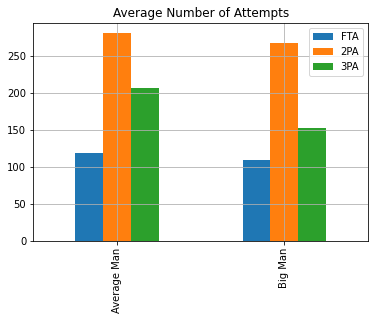

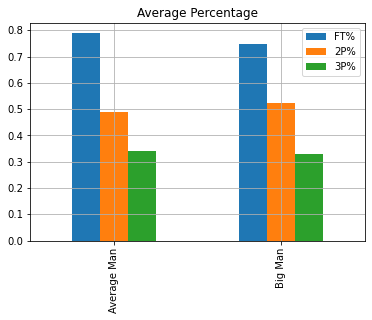

,FTA,2PA,3PA,FT%,2P%,3P%
Average Man,118.478632,280.341880,206.111111,0.788154,0.489128,0.342197
Big Man,109.372549,266.794118,152.676471,0.749667,0.525363,0.329588


In [30]:
tall_short_avg[['FTA','2PA','3PA']].plot(kind='bar', grid=True)
plt.title('Average Number of Attempts')
plt.xlabel(None)
plt.show()

tall_short_avg[['FT%','2P%','3P%']].plot(kind='bar', grid=True)
plt.title('Average Percentage')
plt.xlabel(None)
plt.show()

tall_short_avg